In [77]:
from __future__ import division       
import math
#import matplotlib as mpl              ### May need to uncomment these two lines for mac osx users
#mpl.use('TkAgg')                      ###
from matplotlib import pyplot as plot
plot.style.use('ggplot')
import pandas as pandas
import numpy as numpy
%matplotlib inline

Let's load in the dataset into a pandas dataframe

In [ ]:
manifest = pandas.read_csv("data/titanic_manifest.csv") # read CSV will put all the rows in the csv into a variable called df
manifest.head()

In [ ]:
manifest.tail()

Lets see the types that were imported on our behalf

In [ ]:
manifest.dtypes

In [ ]:
manifest.info()

In [ ]:
manifest.describe()

See the shape of the dataset

In [ ]:
manifest.shape

Here we can see the that it has 891 rows of data and 12 attributes worth of imformation.

In [ ]:
len(manifest) # len is a length function.  we can get the number of rows in the data frame with len

In [ ]:
len(manifest.columns) # this will get the number of columns

In [ ]:
# where df.columns is 
manifest.columns

In [ ]:
manifest["Name"]

In [ ]:
my_famous_passenger = manifest[manifest["Name"] == "Guggenheim, Mr. Benjamin"]
print(my_famous_passenger)

In [ ]:
###Lets get some information about a column

### Like mean age on the boat
manifest["Age"].mean()

### Fare
manifest["Fare"].mean()
manifest["Fare"].describe()

In [ ]:
my_rich_passenger = manifest[manifest["Fare"] == 512.3292]
print(my_rich_passenger)

In [ ]:
####Lets rearrange some columns. This would be very hard to do using a csv library and doing this by hand.
####Panda allows us to do this very intuitively
cols = list(manifest.columns.values)
print(cols)

In [ ]:
#Using that list above, we can create a new list, with the values rearranged.
cols = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'PassengerId']
rearranged_manifest = manifest[cols]
rearranged_manifest.head()

In [ ]:
#### We can create new dataframes from a few attributes
sex_age_dataframe = manifest[["Sex","Age"]]
sex_age_dataframe.head()


In [ ]:
women_dataframe = df[df["Sex"] == "female"] #### Elaborate and find out what it means to df a df? Look up panda series
women_dataframe = df[df["Sex"] == "male"]

In [ ]:
women_dataframe.head()

In [ ]:
women_dataframe.head()

# Excercise 

From the Create one data frame for each Pclass.  Pclass is the passenger class.

* 1 for 1st class
* 2 for 2nd class
* 3 for 3rd class

In [ ]:
#first_class

In [ ]:
#second_class

In [ ]:
#third_class

Observations: There were many people in third class. More so than the other two class of passengers combined.

We can create new attributes from other attributes.

Since we know that Parch is the number of parents or children onboard, and SibSp is the number of siblings or spouses, we could collect those together as a FamilySize

In [ ]:
manifest["FamilySize"] = manifest["SibSp"] + manifest["Parch"]
manifest.head()

In [ ]:
# create a new attribute combining the name with the cabin
manifest["Name_Cabin"] = # what should go here? you can do it!
manifest.tail()
manifest["Name_Cabin"] = # what should go here if I want to format the data like this "<name> - <cabin>" (name dash cabin)
manifest.tail()

In [ ]:
manifest["Age"].hist()

In [ ]:
manifest["Age"].dropna().hist(bins=16, range=(0,80))

In [ ]:
manifest["Fare"].hist()

In [ ]:
plot.scatter(manifest['Fare'], manifest['Survived']) #scatter is a function of x-axis values and y-axis values
plot.show()

In [83]:
### Side step
# Lets create a random numbers scatter plot

rando_dictionary = {'one' : numpy.random.rand(10), # 10 random numbers
     'two' : numpy.random.rand(10)}
print(rando_dictionary)

{'one': array([ 0.00199487,  0.83969045,  0.4416073 ,  0.29033656,  0.04153814,
        0.70683242,  0.22083826,  0.25386163,  0.48769473,  0.81199931]), 'two': array([ 0.27763281,  0.80559853,  0.5901159 ,  0.33630515,  0.00607924,
        0.85451725,  0.95352112,  0.49376034,  0.41613081,  0.11816711])}


In [86]:
rando_dataframe = pandas.DataFrame(rando_dictionary) # create a new data frame with the dictionary of random numbers
rando_dataframe.  # display the top rows in rando_dataframe

,one,two
0,0.448949,0.097787
1,0.879273,0.946836
2,0.159350,0.012555
3,0.569011,0.959735
4,0.127075,0.282426


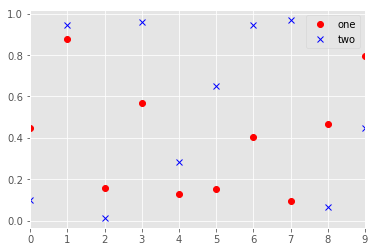

In [87]:
rando_dataframe.plot(style=['ro','bx'])

In [ ]:
##### Back to the titanic. So we have our original dataset
manifest.head()

In [ ]:
#### Lets group them by gender
grouped_by_sex = manifest.groupby(["Sex"])
grouped_by_sex.describe()

In [ ]:
#### Lets group them by gender and passenger class
grouped_by_sex_and_pclass = manifest.groupby(["Sex", "whatgoeshere?"]) # fill it in yourself
grouped_by_sex_and_pclass.describe()

In [ ]:
#### Lets group them by gender and passenger class and who survived
grouped_by_sex_pclass_survived = manifest.groupby(["Sex", "whatgoeshere?", "whatogeshere"]) # fill it in yourself
grouped_by_sex_pclass_survived.describe()

In [ ]:
manifest.groupby(["Sex", "Pclass"]).count() ### Count of records in each group throughout a dataset

# Logistic Regression

In [ ]:
# we can use these libraries.  so let's import them first

import statsmodels.api as stats
import pylab as pylab


In [ ]:
print(manifest.columns)

In [ ]:
# Create a new temporary data frame
temp_manifest = manifest

def gender_to_numeric(x):  # convert sex value to 0 for male and 1 for female because we do logistical regressions on 1s and 0s
    if x == "male":
        return 0
    else:
        return 1

In [71]:
temp_manifest["Sex"] = temp_manifest["Sex"].apply(gender_to_numeric) 
# ths will run each sex value through the function to return a new data frame
temp_manifest.head()

,Survived,Age,Sex,Pclass
0,0,22.0,1,3
1,1,38.0,1,1
2,1,26.0,1,3
3,1,35.0,1,1
4,0,35.0,1,3


In [74]:
temp_manifest = temp_manifest[["Survived", "Age","Sex", "Pclass"]]
temp_manifest = temp_manifest.dropna()
# remember how to display a dataframe? do it here
______

In [76]:
train_cols = temp_manifest.columns[1:] # do you remember what this is?  we saw this yesterday
train_cols

Index(['Age', 'Sex', 'Pclass'], dtype='object')

In [ ]:
logistical_regression = stats.Logit(temp_manifest['Survived'], temp_manifest[train_cols])

#Fit the model
survived_regression = logistical_regression.fit()

In [ ]:
print(survived_regression.summary())

In [ ]:
print(survived_regression.conf_int())